In [2]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(0, '/Users/gabe/projects/recombination/src')
from RecTools import *

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

ln10e10As = 3.047

As = np.exp(ln10e10As)/(10**10)
theta_s_100 = 1.04101

cosmo_params = {
    "omega_b": 0.02242,
    "omega_cdm": 0.11933,
    "n_s": 0.9665,
    "tau_reio": 0.0561,
    "ln10^{10}A_s": ln10e10As,
    "H0": 67.66
}

#same as defaults
noise_parameters = {'beam_FWHM_143_arcmin' : 7.3,
                        'beam_FWHM_217_arcmin' : 4.90,
                        'weight_inv_T_143' : 0.36e-4,
                        'weight_inv_P_143' : 1.61e-4,
                        'weight_inv_T_217' : 0.78e-4,
                        'weight_inv_P_217' : 3.25e-4,
                        'fsky' : 0.8,
                        'use_143' : True,
                        'use_217' : True
                        }  

npoints = 80
zmin=300
zmax=2500
control_pivots = np.linspace(zmin, zmax, npoints+2)
control_pivots_str = ",".join(["{:.2f}".format(p) for p in control_pivots])

target_params = [*cosmo_params.keys(), "xe_control_points"]
print(target_params)
print(control_pivots_str)

recombination_params = {"zmin_pert": zmin,
                        "zmax_pert": zmax,
                        "ll_max": 2500,
                        "thermodynamics_verbose": 0,
                        'xe_pert_type': 'control',
                        "noise_params": noise_parameters,
                        "xe_control_pivots": control_pivots_str
                        }

basename = "ControlTest"

['omega_b', 'omega_cdm', 'n_s', 'tau_reio', 'ln10^{10}A_s', 'H0', 'xe_control_points']
300.00,327.16,354.32,381.48,408.64,435.80,462.96,490.12,517.28,544.44,571.60,598.77,625.93,653.09,680.25,707.41,734.57,761.73,788.89,816.05,843.21,870.37,897.53,924.69,951.85,979.01,1006.17,1033.33,1060.49,1087.65,1114.81,1141.98,1169.14,1196.30,1223.46,1250.62,1277.78,1304.94,1332.10,1359.26,1386.42,1413.58,1440.74,1467.90,1495.06,1522.22,1549.38,1576.54,1603.70,1630.86,1658.02,1685.19,1712.35,1739.51,1766.67,1793.83,1820.99,1848.15,1875.31,1902.47,1929.63,1956.79,1983.95,2011.11,2038.27,2065.43,2092.59,2119.75,2146.91,2174.07,2201.23,2228.40,2255.56,2282.72,2309.88,2337.04,2364.20,2391.36,2418.52,2445.68,2472.84,2500.00


In [3]:
print("test")
generate_new = True
if generate_new:
    RecHistory = RecFisher(cosmo_params, recombination_params, basename)
    path = RecHistory.filebase
    RecHistory.compute_Fisher(target_params)
else:
    path = "/Users/gabe/projects/recombination/data/Jun02.ThetaSFull.3"

test
Created directory /Users/gabe/projects/recombination/data/Aug25.ControlTest.0
Computing Fisher matrix for variables: ['omega_b', 'omega_cdm', 'n_s', 'tau_reio', 'ln10^{10}A_s', 'H0', 'xe_control_points']
omega_b
omega_cdm
n_s
tau_reio
ln10^{10}A_s
H0
test1
Fisher matrices calculation completed at 08/25/2022, 14:12:43


In [3]:
print(path)
Fisher = FisherData(path)

/Users/gabe/projects/recombination/data/Aug02.ControlTest.2


['omega_b', 'omega_cdm', 'n_s', 'tau_reio', 'ln10^{10}A_s', 'H0', '300.00', '336.07', '372.13', '408.20', '444.26', '480.33', '516.39', '552.46', '588.52', '624.59', '660.66', '696.72', '732.79', '768.85', '804.92', '840.98', '877.05', '913.11', '949.18', '985.25', '1021.31', '1057.38', '1093.44', '1129.51', '1165.57', '1201.64', '1237.70', '1273.77', '1309.84', '1345.90', '1381.97', '1418.03', '1454.10', '1490.16', '1526.23', '1562.30', '1598.36', '1634.43', '1670.49', '1706.56', '1742.62', '1778.69', '1814.75', '1850.82', '1886.89', '1922.95', '1959.02', '1995.08', '2031.15', '2067.21', '2103.28', '2139.34', '2175.41', '2211.48', '2247.54', '2283.61', '2319.67', '2355.74', '2391.80', '2427.87', '2463.93', '2500.00']


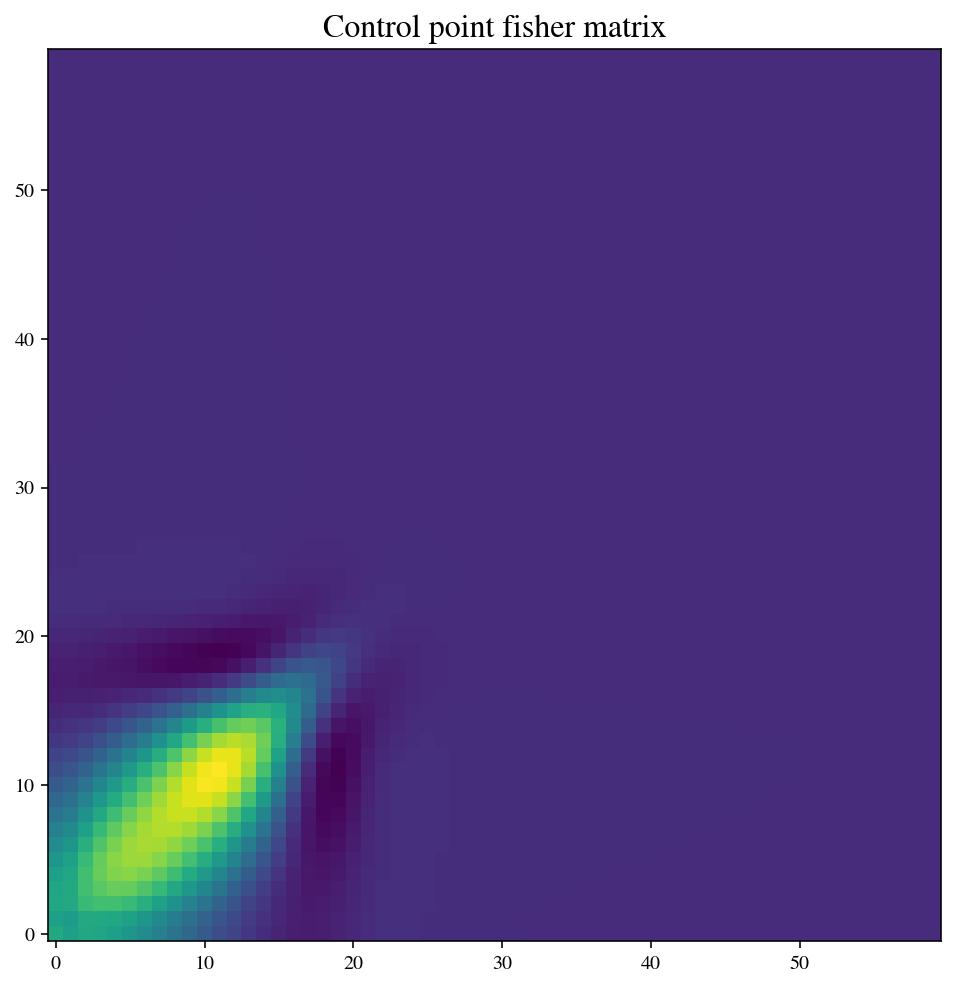

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from matplotlib import cm
scale=1
vsize = scale*8
hsize = scale*10

fig,ax = plt.subplots(figsize=(vsize,hsize))
cols = str(Fisher.col_names).split(",")
print(cols)
cols.remove("{:.2f}".format(zmin))
cols.remove("{:.2f}".format(zmax))
xtick_list = cols
ytick_list = cols
m=ax.imshow(Fisher.Fisher_marginalized, origin='lower', cmap=cm.viridis)

divider = make_axes_locatable(ax)
#ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
#ax.set_yticks([0,1,2,3,4,5,6,7,8,9])

#ax.set_xticklabels(xtick_list)
#ax.set_yticklabels(ytick_list)

ax.set_title("Control point fisher matrix", fontsize=16)

plt.show()

In [ ]:
H0_parameterization=False

if H0_parameterization:
    standard_block = Fisher.get_reparameterized_standard_block(full=False)
else:
    standard_block = Fisher.get_standard_block()


[[ 1.11046452e-08 -5.70777172e-08  6.68330001e-08  4.53520135e-08
   5.37771265e-10  3.22879547e-05]
 [-5.70777172e-08  9.53908295e-07 -1.93904095e-06 -6.16013657e-07
   1.03301205e-06 -4.11970766e-04]
 [ 6.68330001e-08 -1.93904095e-06  7.55526899e-06  1.46363419e-06
  -3.50538382e-06  8.18242961e-04]
 [ 4.53520135e-08 -6.16013657e-07  1.46363419e-06  9.65329590e-06
   1.76193897e-05  2.78618808e-04]
 [ 5.37771265e-10  1.03301205e-06 -3.50538382e-06  1.76193897e-05
   3.91149136e-05 -3.68188471e-04]
 [ 3.22879547e-05 -4.11970766e-04  8.18242961e-04  2.78618808e-04
  -3.68188471e-04  1.90194415e-01]]
 $\Omega_b h^2$ & $\Omega_{cdm}h^2$ & $n_s$ & $\tau_{reio}$ & $\ln10^{10}A_s$ & $H_0$ & \\ 

 1.110e-08 & -5.708e-08 & 6.683e-08 & 4.535e-08 & 5.378e-10 & 3.229e-05 \\ 
 -5.708e-08 & 9.539e-07 & -1.939e-06 & -6.160e-07 & 1.033e-06 & -4.120e-04 \\ 
 6.683e-08 & -1.939e-06 & 7.555e-06 & 1.464e-06 & -3.505e-06 & 8.182e-04 \\ 
 4.535e-08 & -6.160e-07 & 1.464e-06 & 9.653e-06 & 1.762e-05 & 2.786e

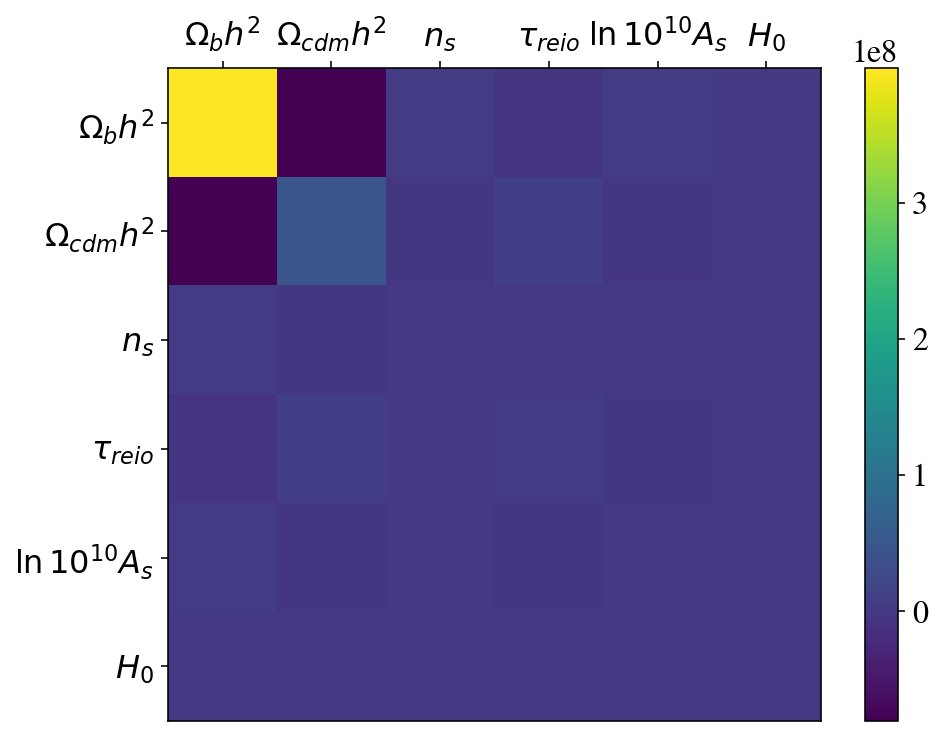

In [ ]:
tick_label_list = ['$\Omega_b h^2$', '$\Omega_{cdm}h^2$', '$n_s$', '$\\tau_{reio}$', '$\ln10^{10}A_s$', '$H_0$']

divider=6

standard_cov = np.linalg.pinv(standard_block[:6, :6])
print(standard_cov)

for s in tick_label_list:
    print(" {} &".format(s), end="")
print(" \\\\ \n")
for i,row in enumerate(standard_cov[:]):
    for val in row:
        if(val==row[-1]):
            print(" {:.3e} \\\\ \n".format(val), end='')
        else:
            print(" {:.3e} &".format(val), end='')

    #print(" \\\\ \n")

fig,ax = plt.subplots()

m = ax.imshow(standard_block[:6,:6], cmap=cm.viridis)

ax.set_xticks(np.arange(divider))
ax.set_yticks(np.arange(divider))

ax.set_xticklabels(tick_label_list)
ax.set_yticklabels(tick_label_list)

#ax.set_xticklabels(cosmo_params.keys())
#ax.set_yticklabels(cosmo_params.keys())

ax.xaxis.tick_top()

plt.colorbar(m)
plt.show()

In [ ]:
forecasts = np.sqrt(np.diag(standard_cov))

for entry in forecasts:
    print(" {:.3e} &".format(entry), end='')

 1.054e-04 & 9.767e-04 & 2.749e-03 & 3.107e-03 & 6.254e-03 & 4.361e-01 &

In [ ]:
j = np.zeros([4,4])
np.fill_diagonal(j, 1.)
j[1,:] = [1,2,3,4]
print(j)

[[1. 0. 0. 0.]
 [1. 2. 3. 4.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
